# RomExchange API Sandbox

Hello, 

RomExchange API Sandbox is currently a notebook where I can tinker with the Ro mobile Exchange API (see API Docs below).
By tinker I mean:
1. Making requests and obtaining data. 
2. Using Data in time series analysis.
3. Implementing time series models e.g. SarimaX

The data coveted is the historical market value of items in the game.

API Docs : https://jessicayeh.github.io/rom-exchange-openapi/#section/Recent-Changes

# Contents

1. **Importing Libraries**  
2. **Making requests**  
3. **Extract Transfer Load**  
4. **Cleaning Data**  
5. **Exploratory Data analysis**  
5. **Time series modeling**  

## 1. Importing Libraries

In [2]:
import pandas as pd
import requests
import json

from time import sleep

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
import seaborn as sns
sns.set()

from numpy import median


## 2. Making Requests

In [3]:
# Define URL and Headers for the get below:
# Pet material data:
url = 'https://www.romexchange.com/api?type=13&sort=change&sort_dir=desc&sort_server=global&range=all&page=1' 
headers = {'User-Agent': 'XY', 'Content-type': 'application/json'}

# To make a request over more periods of time will need to use the page query and set the page=2,3,4,5 etc. 
# Perhaps Automate this? Windows Task Scheduler?

In [4]:
# Make request for the data
r = requests.get(url, headers = headers)

In [5]:
r.status_code

200

In [6]:
# Obtain content of request payload
print(r.text)

[{"name":"Monster's Proof","type":13,"image":null,"global_sea_diff":-31.3,"global":{"all":{"data":[{"snap":true,"price":25000,"time":"2019-09-26T17:35:55Z"},{"snap":true,"price":94954,"time":"2019-09-30T08:46:46Z"},{"snap":false,"price":163845,"time":"2019-10-02T07:37:37Z"},{"snap":false,"price":150334,"time":"2019-10-04T07:51:31Z"},{"snap":false,"price":128320,"time":"2019-10-06T07:44:42Z"},{"snap":false,"price":104677,"time":"2019-10-08T08:16:54Z"},{"snap":false,"price":103055,"time":"2019-10-10T08:17:20Z"},{"snap":false,"price":100822,"time":"2019-10-12T08:22:39Z"},{"snap":false,"price":113308,"time":"2019-10-14T07:31:29Z"},{"snap":false,"price":107321,"time":"2019-10-16T08:10:05Z"},{"snap":false,"price":86126,"time":"2019-10-18T07:28:45Z"},{"snap":false,"price":84621,"time":"2019-10-20T07:47:49Z"},{"snap":false,"price":85909,"time":"2019-10-22T07:48:06Z"},{"snap":false,"price":64963,"time":"2019-10-25T07:40:16Z"},{"snap":false,"price":64942,"time":"2019-10-27T07:43:03Z"},{"snap":fa

## 3. Extract Transfer Load

In [7]:
import json
import pandas as pd
# Jsonify the data payload
j = r.json()
type(j)

list

In [8]:
j

[{'name': "Monster's Proof",
  'type': 13,
  'image': None,
  'global_sea_diff': -31.3,
  'global': {'all': {'data': [{'snap': True,
      'price': 25000,
      'time': '2019-09-26T17:35:55Z'},
     {'snap': True, 'price': 94954, 'time': '2019-09-30T08:46:46Z'},
     {'snap': False, 'price': 163845, 'time': '2019-10-02T07:37:37Z'},
     {'snap': False, 'price': 150334, 'time': '2019-10-04T07:51:31Z'},
     {'snap': False, 'price': 128320, 'time': '2019-10-06T07:44:42Z'},
     {'snap': False, 'price': 104677, 'time': '2019-10-08T08:16:54Z'},
     {'snap': False, 'price': 103055, 'time': '2019-10-10T08:17:20Z'},
     {'snap': False, 'price': 100822, 'time': '2019-10-12T08:22:39Z'},
     {'snap': False, 'price': 113308, 'time': '2019-10-14T07:31:29Z'},
     {'snap': False, 'price': 107321, 'time': '2019-10-16T08:10:05Z'},
     {'snap': False, 'price': 86126, 'time': '2019-10-18T07:28:45Z'},
     {'snap': False, 'price': 84621, 'time': '2019-10-20T07:47:49Z'},
     {'snap': False, 'price':

In [9]:
# Reference for Dataframe indexing below
j[0]

{'name': "Monster's Proof",
 'type': 13,
 'image': None,
 'global_sea_diff': -31.3,
 'global': {'all': {'data': [{'snap': True,
     'price': 25000,
     'time': '2019-09-26T17:35:55Z'},
    {'snap': True, 'price': 94954, 'time': '2019-09-30T08:46:46Z'},
    {'snap': False, 'price': 163845, 'time': '2019-10-02T07:37:37Z'},
    {'snap': False, 'price': 150334, 'time': '2019-10-04T07:51:31Z'},
    {'snap': False, 'price': 128320, 'time': '2019-10-06T07:44:42Z'},
    {'snap': False, 'price': 104677, 'time': '2019-10-08T08:16:54Z'},
    {'snap': False, 'price': 103055, 'time': '2019-10-10T08:17:20Z'},
    {'snap': False, 'price': 100822, 'time': '2019-10-12T08:22:39Z'},
    {'snap': False, 'price': 113308, 'time': '2019-10-14T07:31:29Z'},
    {'snap': False, 'price': 107321, 'time': '2019-10-16T08:10:05Z'},
    {'snap': False, 'price': 86126, 'time': '2019-10-18T07:28:45Z'},
    {'snap': False, 'price': 84621, 'time': '2019-10-20T07:47:49Z'},
    {'snap': False, 'price': 85909, 'time': '20

In [11]:
# make a dataframe out of just the 'data', price' dict headers and add the name of the item
j[0]['name']

dfglobal = pd.DataFrame(j[0]['global']['all']['data'])
dfglobal['name'] = j[0]['name']
dfglobal['server'] = 'Global'

dfsea = pd.DataFrame(j[0]['sea']['all']['data'])
dfsea['name'] = j[0]['name']
dfsea['server'] = 'Sea'

dfsea

df1 = dfglobal.append(dfsea)
df1


,snap,price,time,name,server
0,True,25000,2019-09-26T17:35:55Z,Monster's Proof,Global
1,True,94954,2019-09-30T08:46:46Z,Monster's Proof,Global
2,False,163845,2019-10-02T07:37:37Z,Monster's Proof,Global
3,False,150334,2019-10-04T07:51:31Z,Monster's Proof,Global
4,False,128320,2019-10-06T07:44:42Z,Monster's Proof,Global
...,...,...,...,...,...
45,False,71988,2019-12-26T11:46:24Z,Monster's Proof,Sea
46,False,65054,2019-12-29T11:17:46Z,Monster's Proof,Sea
47,False,68582,2020-01-02T11:33:07Z,Monster's Proof,Sea
48,False,68988,2020-01-08T11:08:31Z,Monster's Proof,Sea


## 4. Cleaning Data

In [12]:
#Cleaning the Date-Time column is necessary. 
# are there any missing values?
df1.isna().sum()


snap      0
price     0
time      0
name      0
server    0
dtype: int64

In [13]:
# Dealing with Date-Time column:
df1.time = pd.to_datetime(df1.time, errors='raise')
df1


,snap,price,time,name,server
0,True,25000,2019-09-26 17:35:55+00:00,Monster's Proof,Global
1,True,94954,2019-09-30 08:46:46+00:00,Monster's Proof,Global
2,False,163845,2019-10-02 07:37:37+00:00,Monster's Proof,Global
3,False,150334,2019-10-04 07:51:31+00:00,Monster's Proof,Global
4,False,128320,2019-10-06 07:44:42+00:00,Monster's Proof,Global
...,...,...,...,...,...
45,False,71988,2019-12-26 11:46:24+00:00,Monster's Proof,Sea
46,False,65054,2019-12-29 11:17:46+00:00,Monster's Proof,Sea
47,False,68582,2020-01-02 11:33:07+00:00,Monster's Proof,Sea
48,False,68988,2020-01-08 11:08:31+00:00,Monster's Proof,Sea


In [14]:
# check that the time column is indeed datetime:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   snap    100 non-null    bool               
 1   price   100 non-null    int64              
 2   time    100 non-null    datetime64[ns, UTC]
 3   name    100 non-null    object             
 4   server  100 non-null    object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 4.0+ KB


In [15]:
# Groupby Server and aggregate price means:
df1.groupby('server')['price'].mean()


server
Global    82983.50
Sea       71630.38
Name: price, dtype: float64

## 5. Exploratory Data Analysis

server
Global    82983.50
Sea       71630.38
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201E5F65888>]],
      dtype=object)

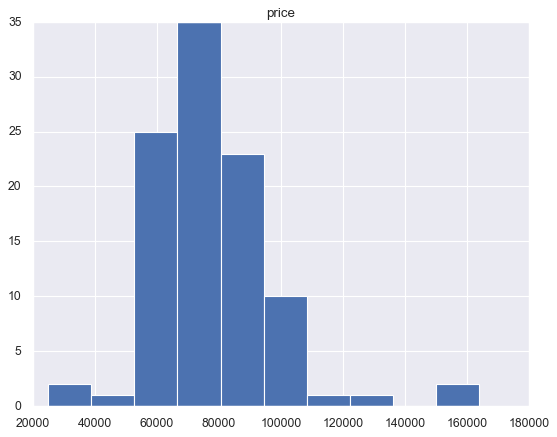

In [60]:
# Looking at the distribution of price
df1.hist(column='price')

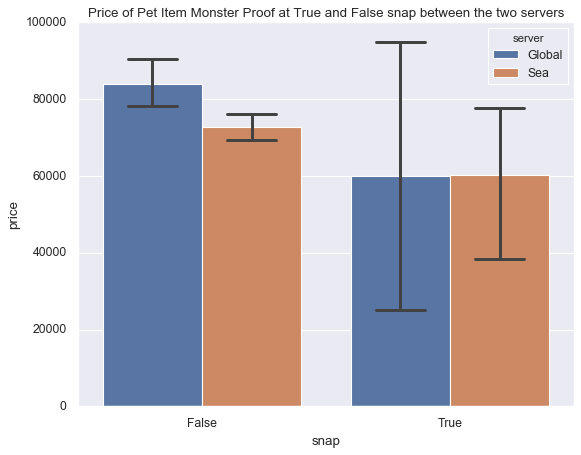

In [65]:
# Is Price higher when snap is True or False?

ax = sns.barplot(x="snap", y="price", hue='server', data=df1, capsize=0.2).set_title('Price of Pet Item Monster Proof at True and False snap between the two servers')

In [98]:
# Plot the Monster proof item data with Matplotlib defaults@:
df1.set_index('time', inplace=True)

In [99]:
df1

,snap,price,name,server
time,,,,
2019-09-26 17:35:55+00:00,True,25000,Monster's Proof,Global
2019-09-30 08:46:46+00:00,True,94954,Monster's Proof,Global
2019-10-02 07:37:37+00:00,False,163845,Monster's Proof,Global
2019-10-04 07:51:31+00:00,False,150334,Monster's Proof,Global
2019-10-06 07:44:42+00:00,False,128320,Monster's Proof,Global
...,...,...,...,...
2019-12-26 11:46:24+00:00,False,71988,Monster's Proof,Sea
2019-12-29 11:17:46+00:00,False,65054,Monster's Proof,Sea
2020-01-02 11:33:07+00:00,False,68582,Monster's Proof,Sea


## 6. Time series modeling

In [21]:
# This is the Arima alternative reddit post
# https://www.reddit.com/r/datascience/comments/gro5w8/alternative_approaches_to_arima_for_time_series/